In [49]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers


print(tf.__version__)

2.12.0


In [2]:
!pip install seaborn


In [3]:
df = pd.read_csv("diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Clean Data**

In [4]:
dataset = df.copy()
dataset.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


**Check unknown rows**

In [5]:
dataset.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Drop rows**

In [6]:
dataset = dataset.dropna()

**Convert Categories to Numbers**

**Split data into train and test**

In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

**Inspect Data(Joint distribution)**

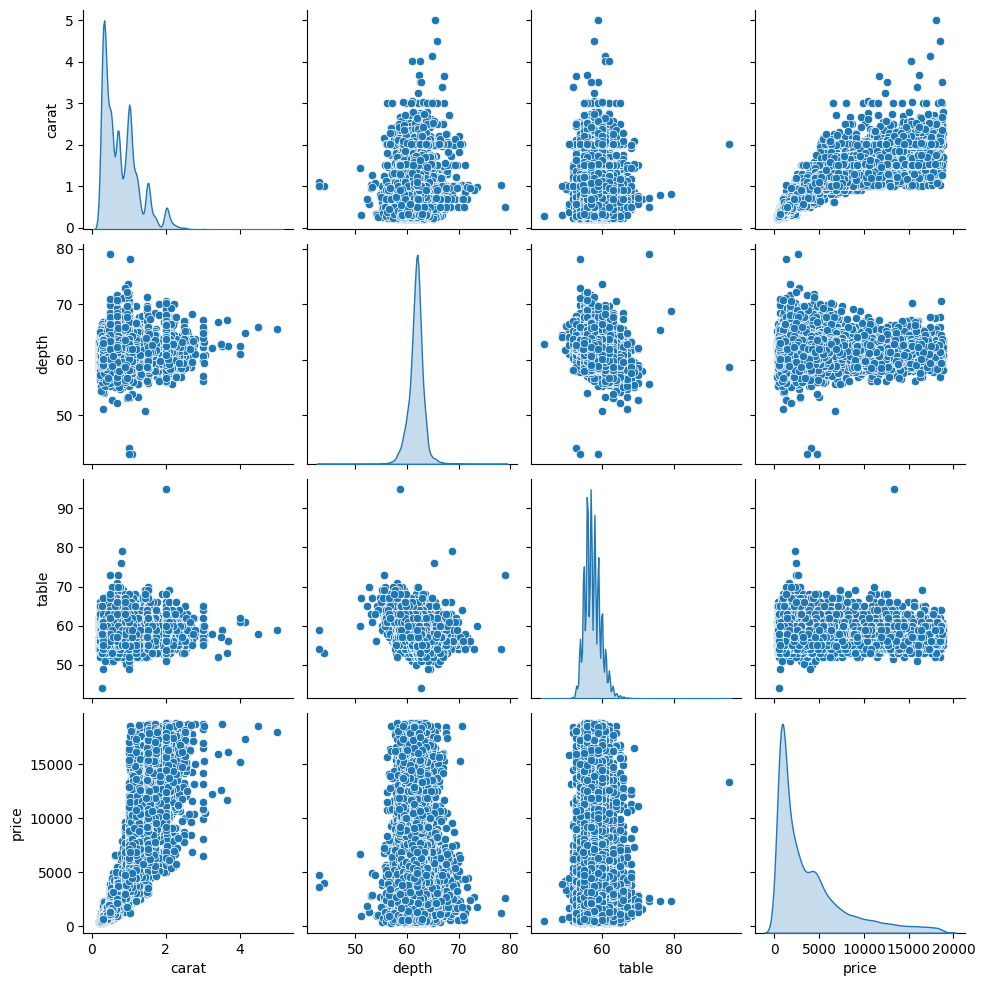

In [8]:
sns.pairplot(train_dataset[['carat', 'cut','color', 'clarity','depth', 'table','price']], diag_kind='kde')

**Overall Statistics**

In [9]:
train_stat = train_dataset.describe()
train_stat.pop('carat')

train_stat = train_stat.transpose()
train_stat



,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43152.0,26971.002758,15560.028486,1.0,13491.75,27019.00,40412.50,53940.00
depth,43152.0,61.747900,1.430988,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.455726,2.233570,44.0,56.00,57.00,59.00,95.00
price,43152.0,3929.801237,3989.630670,326.0,948.00,2400.00,5315.25,18818.00
x,43152.0,5.728950,1.122392,0.0,4.71,5.69,6.54,10.74
y,43152.0,5.732241,1.142865,0.0,4.72,5.71,6.53,58.90
z,43152.0,3.537722,0.708590,0.0,2.91,3.52,4.03,31.80


**Split features from labels**

In [10]:
# Assuming you have defined and prepared your train_dataset and test_dataset earlier
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('carat')
test_labels = test_features.pop('carat')


**Normalize data to range of 1 or 0**

In [13]:
def norm(x):
  return (x - train_stat['mean']) / train_stat['std']
  norm_train = norm(train_dataset)
  norm_test = norm(test_dataset)

**Build model using 3 layers**

In [24]:
Table = np.array(train_features['table'])

table_normalizer = layers.Normalization(input_shape=[1,], axis=None)
table_normalizer.adapt(Table)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(12)
])

**Build the model**

In [46]:
# model = keras.Sequential([
#       layers.Dense(64, activation = tf.nn.relu, input_shape = [len(train_dataset.key())]),
#       layers.Dense(64, activation = tf.nn.relu),
#       layers.Dense(1)
#       ])
# optimizer = tf.keras.optimizers.RMSprop(0.001)

# model.compile(loss = 'mse',
#               optimizer = optimizer,
#               metrics = ['mae', 'mse'])
model = tf.keras.Sequential([
    table_normalizer,
    layers.Dense(units=1)
])


**Summary of Model**

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [27]:
model.predict(Table[:10])

1/1 [==============================] - 0s 37ms/step


array([[-1.8981401 ],
       [-1.1252078 ],
       [ 0.42065704],
       [-1.1252078 ],
       [-0.35227537],
       [-2.6710725 ],
       [ 0.42065704],
       [-2.6710725 ],
       [-0.19768828],
       [-1.8981401 ]], dtype=float32)

**Train the model**

In [45]:
Table = np.array(train_features['table'])

table_normalizer = layers.Normalization(input_shape=[1,], axis=None)
table_normalizer.adapt(Table)

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

**Train model for 100 epochs**

In [31]:
history = model.fit(
    train_features['table'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)



**Visualize the model training progress using stats**

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.371350,0.361794,95
96,0.371169,0.371264,96
97,0.371359,0.362219,97
98,0.371961,0.363972,98
99,0.370451,0.385752,99


In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [table]')
  plt.legend()
  plt.grid(True)

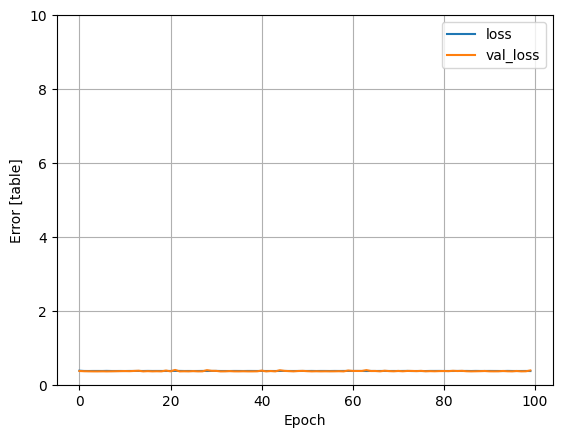

In [38]:
plot_loss(history)

**Results on the test**

In [39]:
test_results = {}

test_results['model'] = model.evaluate(
    test_features['table'],
    test_labels, verbose=0)

**View the model's predictions**

In [40]:
x = tf.linspace(0.0, 250, 251)
y = model.predict(x)

8/8 [==============================] - 0s 1ms/step


**Make Prediction**

In [42]:
def plot_table(x, y):
  plt.scatter(train_features['table'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('table')
  plt.ylabel('carat')
  plt.legend()

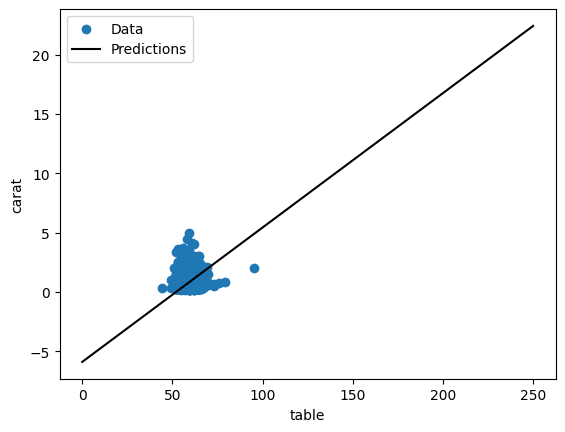

In [43]:
plot_table(x, y)

**Create a two-step Keras Sequential model**

In [47]:
linear_model = tf.keras.Sequential([
    table_normalizer,
    layers.Dense(units=1)
])



In [53]:
linear_model.predict(train_features[:10])



ValueError: ignored

**Check that the kernel weights **

In [54]:
linear_model.layers[1].kernel

<tf.Variable 'dense_8/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.075502]], dtype=float32)>

**Configure the model with Keras Model.compile and train with Model.fit for 100 epochs:**

In [55]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [57]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

ValueError: ignored

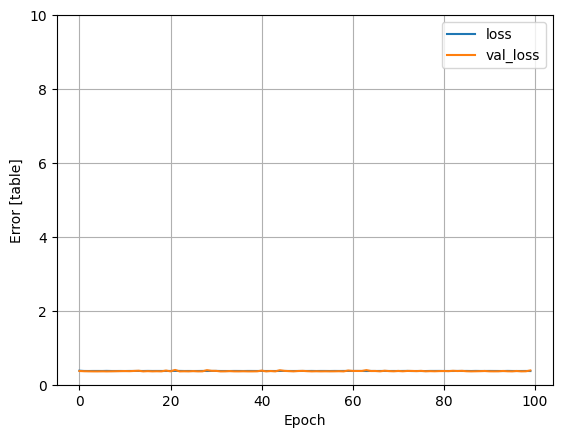

In [58]:
plot_loss(history)

**Collect the results on the test set**

In [59]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

ValueError: ignored

**Deep Neutral Network(DNN) **

**Build and compile model**

In [60]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

**Create a DNN model**

In [61]:
dnn_table_model = build_and_compile_model(table_normalizer)

In [62]:
dnn_table_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 64)                128       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


**Train the model **

In [65]:
history = dnn_table_model.fit(
    train_features['table'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_table_model.predict(x)

In [ ]:
plot_table(x, y)

**Collect the results on the test set for later**

In [ ]:
test_results['dnn_table_model'] = dnn_table_model.evaluate(
    test_features['table'], test_labels,
    verbose=0)

**Repeat the previous process using all the inputs**

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

**Performance**

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

 **Check the error distribution**

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')